# SeaBorn plotting

### Data set: https://www.kaggle.com/datasets/alihassankp/dubizzle-used-car-sale-data?resource=download

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from  matplotlib.ticker import FuncFormatter

In [27]:
df = pd.read_csv("data.csv", thousands=',')

In [28]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%d/%m/%Y')

In [29]:
df['year'] = df['year'].fillna(0).astype(np.int64)

In [30]:
df['company'].replace('mercedes-maybach','maybach', inplace=True)

In [31]:
df.head(10)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013,Silver,Dubai,GLS,mitsubishi,pajero,2022-05-13
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018,White,Sharjah,1500 High Country,chevrolet,silverado,2022-01-14
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014,Blue,Sharjah,E 300,mercedes-benz,e-class,2022-05-05
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018,Red,Dubai,Standard,ferrari,488-spider,2022-04-30
4,USED RENAULT DOKKER 2020,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020,White,Dubai,Standard,renault,dokker,2022-05-13
5,A7 S-line Quattro. Under Warranty. Accidents F...,98000,84000,Perfect inside and out,Perfect inside and out,Owner,Sedan,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2015,Gold,Dubai,S-line,audi,a7,2022-04-30
6,"AED 4,999 /MONTH| JEEP GRAND CHEROKEE SRT V8 6...",257000,68000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2019,Black,Dubai,SRT,jeep,grand-cherokee,2022-03-20
7,2022 Mitsubishi L200 2.4L 4x4 AT | EXPORT ONLY,82000,0,Perfect inside and out,Perfect inside and out,Dealer,Pick Up Truck,4,Automatic Transmission,Other,Unknown,Diesel,Left Hand Side,0,Silver,Dubai,Other,mitsubishi,l200,2022-02-15
8,TOYOTA LC PICKUP FULL OPTION 2022,149000,0,Perfect inside and out,Perfect inside and out,Dealer,Pick Up Truck,6,Manual Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,0,Beige,Abu Dhabi,70th Anniversary,toyota,land-cruiser-76-series,2022-05-11
9,Warranty | 0 Down payment | Model 2013 | V6 en...,35999,111749,Perfect inside and out,Perfect inside and out,Dealer,Van,6,Automatic Transmission,North American Specs,200 - 300 HP,Gasoline,Left Hand Side,2013,Silver,Dubai,SV,nissan,quest,2021-08-07


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 9965 non-null   object        
 1   price_in_aed          9970 non-null   int64         
 2   kilometers            9970 non-null   int64         
 3   body_condition        9970 non-null   object        
 4   mechanical_condition  9970 non-null   object        
 5   seller_type           9970 non-null   object        
 6   body_type             9970 non-null   object        
 7   no_of_cylinders       9911 non-null   object        
 8   transmission_type     9970 non-null   object        
 9   regional_specs        9970 non-null   object        
 10  horsepower            9970 non-null   object        
 11  fuel_type             9970 non-null   object        
 12  steering_side         9970 non-null   object        
 13  year              

# Checking for incorect values

In [33]:
df['body_condition'].unique()

array(['Perfect inside and out', 'Normal wear & tear, a few issues',
       'A bit of wear & tear, all repaired',
       'No accidents, very few faults'], dtype=object)

In [34]:
df['mechanical_condition'].unique()

array(['Perfect inside and out', 'Minor faults, all fixed',
       'Major faults fixed, small remain', 'Ongoing minor & major faults',
       'Major faults, all fixed'], dtype=object)

In [35]:
df['seller_type'].unique()

array(['Dealer', 'Owner', 'Dealership/Certified Pre-Owned'], dtype=object)

In [36]:
df['transmission_type'].unique()

array(['Automatic Transmission', 'Manual Transmission'], dtype=object)

In [37]:
df['fuel_type'].unique()

array(['Gasoline', 'Diesel', 'Electric', 'Hybrid'], dtype=object)

In [38]:
df['steering_side'].unique()

array(['Left Hand Side', 'Right Hand Side'], dtype=object)

# Ploting


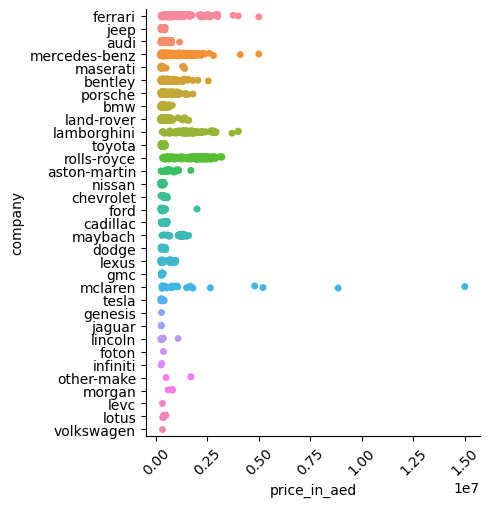

In [39]:
sns.catplot(data=df.loc[df['price_in_aed'] > (df['price_in_aed'].mean())], y="company", x="price_in_aed")
plt.xticks(rotation=45)
plt.show()

In [40]:
plt.pie(df['seller_type'].value_counts(), labels=df['seller_type'].unique(), autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7f6f85c5c670>,
 [Text(-0.5842496553550048, 0.9320152038553654, 'Dealer'),
  Text(0.5029378336066744, -0.9782911302506148, 'Owner'),
  Text(1.096021327939478, -0.09347325126357578, 'Dealership/Certified Pre-Owned')],
 [Text(-0.31868163019363893, 0.5083719293756538, '68%'),
  Text(0.2743297274218224, -0.5336133437730626, '29%'),
  Text(0.5978298152397151, -0.05098540978013224, '3%')])

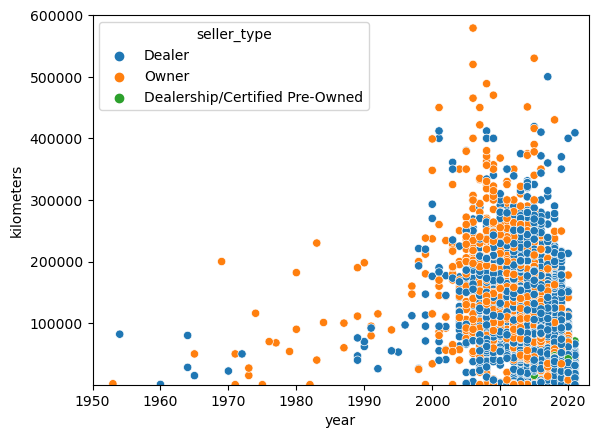

In [88]:
sns.scatterplot(data=df, x="year", y="kilometers", hue="seller_type")
plt.xlim(1950, 2023)
plt.ylim(1, 600000)
plt.show()

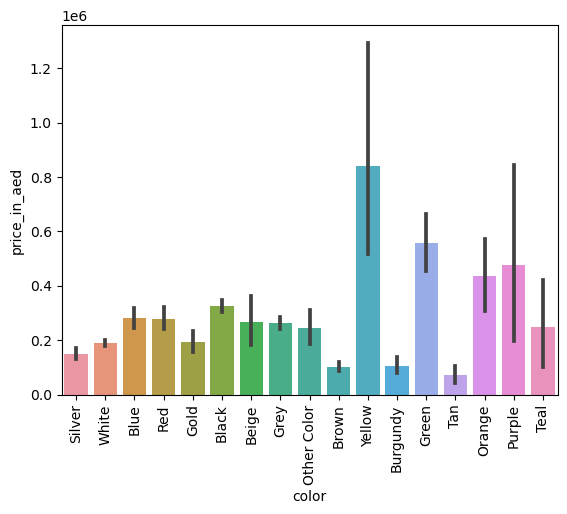

In [42]:
sns.barplot(data=df, x="color", y="price_in_aed")
plt.xticks(rotation=90)
plt.show()

In [43]:
df['steering_side'].value_counts()

Left Hand Side     9965
Right Hand Side       5
Name: steering_side, dtype: int64

In [44]:
df['company'].value_counts().head(10)

mercedes-benz    1506
nissan            898
toyota            868
bmw               690
land-rover        577
ford              551
porsche           390
audi              381
lexus             331
jeep              314
Name: company, dtype: int64

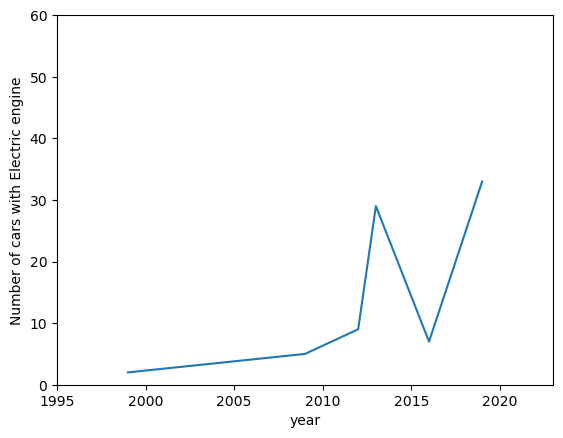

In [45]:
sns.lineplot(data=df, x='year', y=df['fuel_type'].loc[df['fuel_type'] == 'Electric'].groupby([df.year]).agg('count'))
plt.xlim(1995, 2023)
plt.ylim(0, 60)
plt.ylabel("Number of cars with Electric engine")
plt.show()

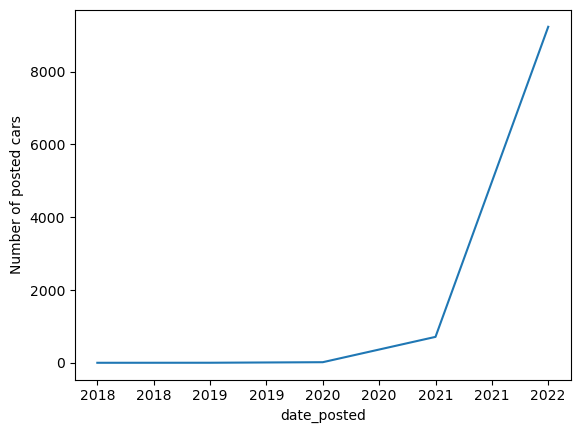

In [46]:
sns.lineplot(data=df['date_posted'].groupby([df.date_posted.dt.year]).agg('count'))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.ylabel("Number of posted cars")
plt.show()

In [47]:
df['date_posted'].groupby([df.date_posted.dt.year]).agg('count')

date_posted
2018       2
2019       3
2020      18
2021     714
2022    9233
Name: date_posted, dtype: int64

# Analysis of Top1 popular brand - Mercerdes

In [48]:
dfm = df.loc[df['company'] == 'mercedes-benz']

In [79]:
dfm['model'].groupby(dfm.model).agg('count').nlargest(10).keys()

Index(['s-class', 'g-class', 'c-class', 'e-class', 'cls-class', 'gle-coupe',
       'a-class', 'glc', 'gl-class', 'cla'],
      dtype='object', name='model')

In [80]:
dfm['model'].groupby(dfm.model).agg('count').nlargest(10).values

array([260, 259, 192, 181,  66,  51,  46,  46,  41,  38])

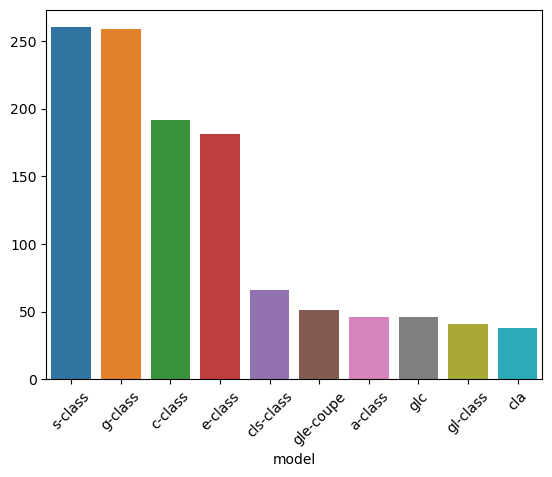

In [87]:
data = dfm['model'].groupby(dfm.model).agg('count').nlargest(10)
sns.barplot(data = dfm['model'], x=data.keys(), y=data.values)
plt.xticks(rotation=45)
plt.show()

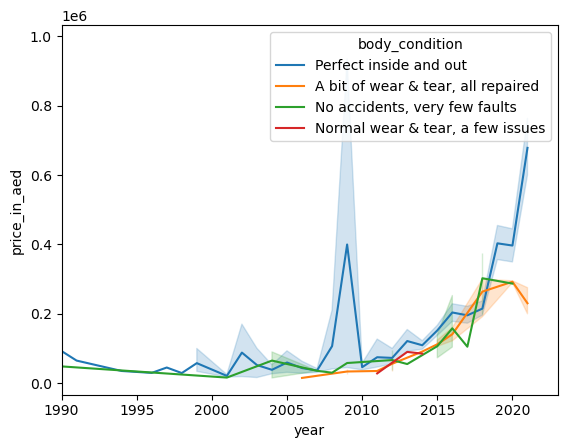

In [53]:
sns.lineplot(data=dfm, x='year', y='price_in_aed', hue='body_condition')
plt.xlim(1990, 2023)
plt.show()

In [93]:
dfm['price_in_aed'].mean()

369330.8479415671